**Credit Card Application Approval Prediction**

---

Support Vector Machine (SVM)




No Normalization

In [ ]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

df = pd.read_csv('/content/UniversalBank.csv')

df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 5000 non-null   int64  
 1   Age                5000 non-null   int64  
 2   Experience         5000 non-null   int64  
 3   Income             5000 non-null   int64  
 4   ZIP Code           5000 non-null   int64  
 5   Family             5000 non-null   int64  
 6   CCAvg              5000 non-null   float64
 7   Education          5000 non-null   int64  
 8   Mortgage           5000 non-null   int64  
 9   PersonalLoan       5000 non-null   int64  
 10  SecuritiesAccount  5000 non-null   int64  
 11  CDAccount          5000 non-null   int64  
 12  Online             5000 non-null   int64  
 13  CreditCard         5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
df.isnull().sum()

ID                   0
Age                  0
Experience           0
Income               0
ZIP Code             0
Family               0
CCAvg                0
Education            0
Mortgage             0
PersonalLoan         0
SecuritiesAccount    0
CDAccount            0
Online               0
CreditCard           0
dtype: int64

In [ ]:
#do comparison with different algorithms

In [ ]:
df.describe(include='all')

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
df1 = df.drop(['ID', 'ZIP Code'],axis=1)
df1.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [ ]:
df1.corr()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
Age,1.000000,0.994215,-0.055269,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.994215,1.000000,-0.046574,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.055269,-0.046574,1.000000,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.046418,-0.052563,-0.157501,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.050077,0.645984,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.013152,-0.187524,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.010582,0.206806,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
PersonalLoan,-0.007726,-0.007413,0.502462,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
SecuritiesAccount,-0.000436,-0.001232,-0.002616,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CDAccount,0.008043,0.010353,0.169738,0.014110,0.136534,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644


<Axes: >

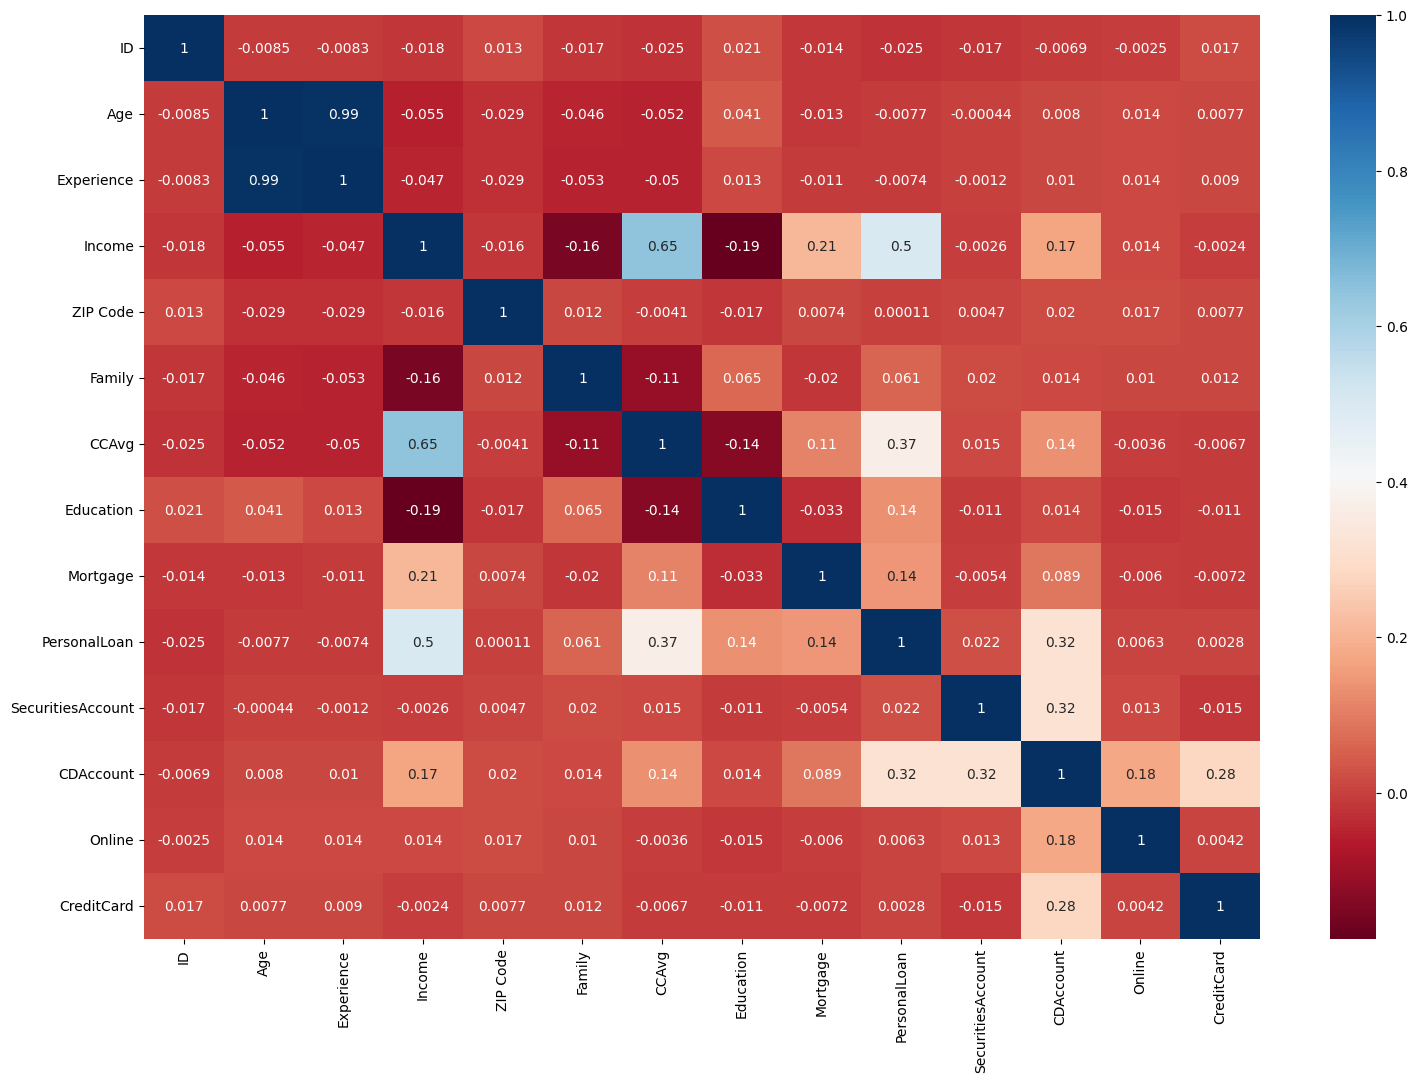

In [ ]:
#control the size of visualization

plt.figure(figsize=(18,12)) #normally not more than 18, height is up to you

sns.heatmap(df.corr(), annot=True, cmap='RdBu')


In [ ]:
df1['CreditCard'].value_counts()

CreditCard
0    3530
1    1470
Name: count, dtype: int64

In [ ]:
X = df1.iloc[:,:-1].values

y = df1['CreditCard'].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train.shape

(4000, 11)

In [ ]:
#modelling
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
#svm no support the number of data that close to the number of row
SVM_bank = SVC()

#training

SVM_bank.fit(X_train, y_train)

#prediction

y_hat = SVM_bank.predict(X_test)


#evaluation

print('The accuracy based on RBF kernel is:', (accuracy_score(y_test, y_hat))*100)

The accuracy based on RBF kernel is: 70.39999999999999


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SVM_bank = SVC()

#training
SVM_bank.fit(X_train, y_train)

#prediction
y_hat = SVM_bank.predict(X_test)

#evaluation
print('The Accuracy based on RBF kernal is :', (accuracy_score(y_test,y_hat))*100)

The Accuracy based on RBF kernal is : 70.39999999999999


In [ ]:
#the accuracy of SVM will be slightly better of higher than the RBF

In [ ]:
SVM_bank = SVC(kernel='linear')


#training
SVM_bank.fit(X_train,y_train)

#prediction
y_hat = SVM_bank.predict(X_test)

#evaluation
print('The Accuracy based on RBF kernal is :', (accuracy_score(y_test,y_hat))*100)

The Accuracy based on RBF kernal is : 74.7


In [ ]:
SVM_bank = SVC(kernel='poly')


#training
SVM_bank.fit(X_train,y_train)

#prediction
y_hat = SVM_bank.predict(X_test)

#evaluation
print('The Accuracy based on RBF kernal is :', (accuracy_score(y_test,y_hat))*100)

The Accuracy based on RBF kernal is : 70.39999999999999


In [ ]:
SVM_bank = SVC(kernel='sigmoid')


#training
SVM_bank.fit(X_train,y_train)

#prediction
y_hat = SVM_bank.predict(X_test)

#evaluation
print('The Accuracy based on RBF kernal is :', (accuracy_score(y_test,y_hat))*100)

The Accuracy based on RBF kernal is : 59.599999999999994
